# Example Sub-notebook

In [2]:
%matplotlib inline


In [1]:
import os

import numpy as np
import pandas as pd
import json
import os
import yaml
from loguru import logger
from matplotlib import pyplot as plt
from survos2 import survos

from survos2.frontend.control import Launcher
from survos2.model import DataModel
from survos2.improc.utils import DatasetManager
from survos2.server.pipeline import run_workflow
from survos2.server.state import cfg
from survos2.server.pipeline import view_dataset
from survos2.frontend.nb_utils import start_server, stop_server
from mlflow_utils import log_mlflow, plot_image

In [3]:
import papermill as pm

In [4]:
from mlflow_config import EXPERIMENT, RUN_NAME, ARTIFACT_DIR

In [31]:
workspace_name = 'vf_main2_sept11_roi_0_128_308_698_338_723'
port = 8870
method='U_NET_PLUS_PLUS'
loss_criterion='BCEDiceLoss'
encoder_type='resnet34'

In [32]:

run_params = {'experiment': EXPERIMENT,
              'iteration': RUN_NAME,
              'artifact_dir': ARTIFACT_DIR,
              'workspace_name': workspace_name,
              'method':method,
              'loss_criterion':loss_criterion,
              'encoder_type':encoder_type}

In [33]:
run_params

{'experiment': 'seg_testA',
 'iteration': 'initialtest',
 'workspace_name': 'vf_main2_sept11_roi_0_128_308_698_338_723',
 'method': 'U_NET_PLUS_PLUS',
 'artifact_dir': 'artifact_dir'}

In [ ]:
server_process = start_server(port)

In [8]:
DataModel.g.current_workspace = workspace_name
DataModel.g.current_session = 'default'

In [9]:
server_uri = '127.0.0.1:' + str(port)

In [10]:
Launcher.g.set_remote(server_uri)
DataModel.g.server_uri = server_uri

INFO - Launcher setting remote to 127.0.0.1:8870  - survos2.frontend.control.launcher:set_remote:85


In [11]:
Launcher.g.run('workspace', 'set_workspace', workspace=workspace_name)

In [12]:
Launcher.g.run('features', 'existing', workspace=workspace_name)

{'001_raw': {'kind': 'raw', 'name': '001 Raw', 'id': '001_raw'}}

In [1]:
#Launcher.g.run('annotations', 'get_levels', workspace=workspace_name)

In [16]:
feature_name = '001_raw'

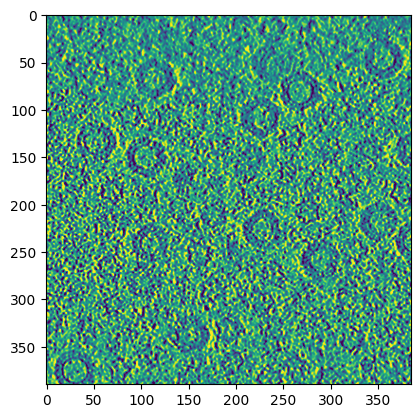

In [17]:
feature_array = view_dataset(feature_name, 'features', 50)

In [ ]:
#log_mlflow(run_params, feature_name, np.mean(feature_array), feature_array[50,:])

# Multi-axis CNN

In [34]:
result = Launcher.g.run('pipelines', 'create', workspace=workspace_name, pipeline_type="train_multi_axis_cnn")

In [35]:
result

{'name': '003 Train Multi Axis Cnn',
 'kind': 'train_multi_axis_cnn',
 'id': '003_train_multi_axis_cnn'}

In [36]:
pipeline_name = result['name']
pipeline_id = result['id']

In [37]:
src = DataModel.g.dataset_uri(pipeline_id, group="pipelines")
src

'survos://default@vf_main2_sept11_roi_0_128_308_698_338_723:pipelines/003_train_multi_axis_cnn'

In [38]:
DataModel.g.current_workspace

'vf_main2_sept11_roi_0_128_308_698_338_723'

In [39]:
dst = src

In [40]:
params = {
  'src': src,
  'dst': dst,  
  'anno_id': [['014_level', '014 Level']],
  'feature_id': [['001_raw', '001 Raw']],
  'kind': 'train_multi_axis_cnn',
  'multi_ax_train_params': {'bce_dice_alpha': '0.75',
   'bce_dice_beta': '0.25',
   'cyc_frozen': 2,
   'cyc_unfrozen': 1,
   'encoder_type': encoder_type,# 'resnet34', 'resnet50', 'resnext50_32x4d'
   'loss_criterion': loss_criterion, # 'DiceLoss', 'CrossEntropyLoss', 'GeneralizedDiceLoss', 'BCELoss', 'BCEDiceLoss'
   'model_type': method,
   'patience': '3'},
  'name': pipeline_name,
  'source': '001_raw',
  'workspace': [[workspace_name, workspace_name]],
  'id': '004_train_multi_axis_cnn'}

In [41]:
result = Launcher.g.run('pipelines', 'train_multi_axis_cnn', json_transport=True, **params)

{'kind': 'train_multi_axis_cnn',
 'name': '003 Train Multi Axis Cnn',
 'workspace': [['vf_main2_sept11_roi_0_128_308_698_338_723',
   'vf_main2_sept11_roi_0_128_308_698_338_723']],
 'anno_id': [['003_level', '003 Level']],
 'feature_id': [['001_raw', '001 Raw']],
 'multi_ax_train_params': {'bce_dice_alpha': '0.75',
  'bce_dice_beta': '0.25',
  'cyc_frozen': 1,
  'cyc_unfrozen': 1,
  'encoder_type': 'resnet34',
  'loss_criterion': 'DiceLoss',
  'model_type': 'U_NET_PLUS_PLUS',
  'patience': '3'},
 'source': '003_train_multi_axis_cnn',
 'id': '003_train_multi_axis_cnn'}

In [ ]:
pipeline_id = result['id']

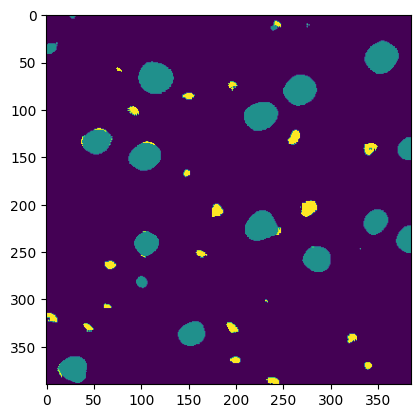

In [42]:
pipeline_array = view_dataset(pipeline_id, 'pipelines', 50)

In [ ]:
#np.unique(pipeline_array)

In [44]:
#result = Launcher.g.run('analyzer', 'create', workspace=workspace_name, analyzers_type=0)

In [ ]:
#analyzer_name = result['id']

In [ ]:
#src = DataModel.g.dataset_uri(analyzer_name, group="analyzer")

In [46]:
params = {
  'src': src,
  'dst': src, 
  'workspace': workspace_name,
  'label_index': 2,
  'area_min': 0,
  'area_max': 100000000,
  'mode': '1',
  'pipelines_id': pipeline_id,
  'analyzers_id': pipeline_id,
  'annotations_id': pipeline_id,
}

NameError: name 'pipeline_id' is not defined

In [45]:
#result = Launcher.g.run('analyzer', 'find_connected_components', json_transport=False, **params)

{'detail': [{'loc': ['query', 'src'],
   'msg': 'field required',
   'type': 'value_error.missing'},
  {'loc': ['query', 'dst'],
   'msg': 'field required',
   'type': 'value_error.missing'},
  {'loc': ['query', 'workspace'],
   'msg': 'field required',
   'type': 'value_error.missing'},
  {'loc': ['query', 'label_index'],
   'msg': 'field required',
   'type': 'value_error.missing'},
  {'loc': ['query', 'area_min'],
   'msg': 'field required',
   'type': 'value_error.missing'},
  {'loc': ['query', 'area_max'],
   'msg': 'field required',
   'type': 'value_error.missing'},
  {'loc': ['query', 'mode'],
   'msg': 'field required',
   'type': 'value_error.missing'},
  {'loc': ['query', 'pipelines_id'],
   'msg': 'field required',
   'type': 'value_error.missing'},
  {'loc': ['query', 'analyzers_id'],
   'msg': 'field required',
   'type': 'value_error.missing'},
  {'loc': ['query', 'annotations_id'],
   'msg': 'field required',
   'type': 'value_error.missing'}]}

In [ ]:
#print(result)

In [ ]:
#print(len(result))

In [ ]:
stop_server(server_process)